# BIG DATA: Práctica: Regresión lineal (mínimos cuadrados ordinarios) con python
Cargar las librerías


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Datos del dataset \#1 de Anscombe

In [8]:
df = pd.read_csv("/kaggle/input/data-anscombes-quartet/Anscombe_quartet_data.csv")

df["x"] = df["x123"]
df["y"] = df["y1"]

## Echar un vistazo

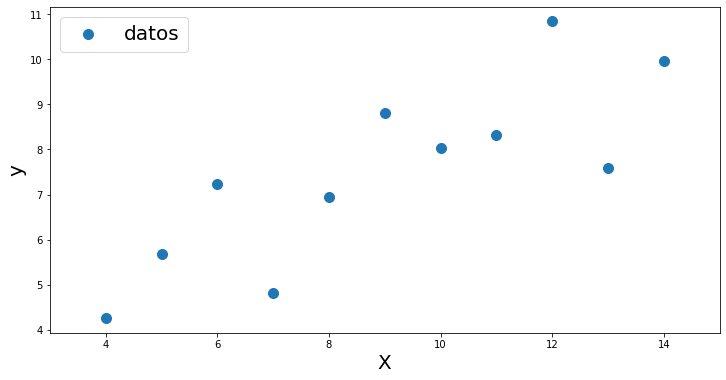

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(df["x"], df["y"], s=100, label='datos')
plt.legend(loc='upper left', fontsize=20)
plt.xlim(3,15)
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20);

## [Mínimos cuadrados ordinarios](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados_ordinarios#Modelo_de_regresi%C3%B3n_simple)

Ecuación de una línea recta:

$$\large y = \beta_1 x + \beta_0 $$

La ecuación de $\beta_1$

$$\large \beta_1 = \frac{ \sum \left( (x_i - \overline{x}) (y_i - \overline{y}) \right) } {\sum  (x_i - \overline{x})^2}$$


y la ecuación de $\beta_0$

$$\large \beta_0 = \overline{y} - \beta_1 \overline{x} $$

Funciones de ayuda:

* [`len(x)`](https://docs.python.org/3/library/functions.html#len) - hallar la longitud de un objeto, aquí `x`.
* $x_i$ es la serie `x`
* $\overline{x}$ es [`np.mean(x)`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
* $x^2$ en código se esctibe `x**2`
* $\sum x_i$ es [`np.sum(x)`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) donde el simbolo $\sum$ representa un [sumatorio](https://es.wikipedia.org/wiki/Sumatorio)


In [15]:
x = df["x"]
y = df["y"]

# datos "place-holder" de momento ; these values are incorrect and random
# b1 = -0.6
# b0 = 8

# escribir tu código aquí para calcular b1 y b0 de verdad
# Pay attention to the parenthesis
def minimos_cuadrados_ordinarios(x,y):
    b1 = np.sum((x - np.mean(x)) * (y - np.mean(y)))/np.sum((x - np.mean(x))**2)
    b0 = np.mean(y) - b1 * np.mean(x)
    return b1,b0
b1,b0 = minimos_cuadrados_ordinarios(x,y) # setting a new variable

print("b1 = ", b1)
print("b0 = ", b0)
print("len(x) = ", len(x))
#print(b1,b0)

b1 =  0.5000909090909091
b0 =  3.0000909090909103
len(x) =  11


## Dibujar nuestro ajuste

Usar tus valores para $\beta_1$ y $\beta_0$

In [11]:
df["y_pred"] =  b1*df["x"] + b0 

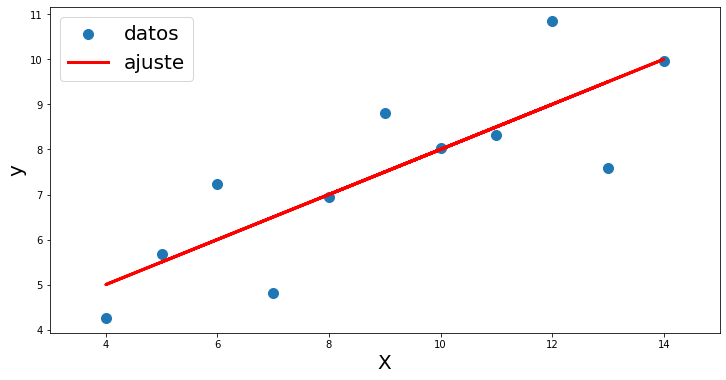

In [12]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(df["x"], df["y"], s=100, label='datos')
plt.plot(df["x"], df["y_pred"], color="red", lw=3, label='ajuste')
plt.legend(loc='upper left', fontsize=20)
plt.xlim(3,15)
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20);

## Ya con los datos del [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/) dataset

In [ ]:
# leer los datos y guardarlas en un dataframe llamado "dataset"

dataset = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

echar un vistazo

In [ ]:
dataset

vamos a dibujar la columna `GrLivArea` frente a la columna `SalePrice`:

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(dataset["GrLivArea"], dataset["SalePrice"], s=50, label='datos')
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('GrLivArea', fontsize=20)
plt.ylabel('SalePrice', fontsize=20);

y el ajuste

In [ ]:
x = dataset["GrLivArea"]
y = dataset["SalePrice"]

# escribir to código aquí

print(b1, b0)

dataset["y_pred"] = b1*x + b0 

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(x,y, s=50, label='datos')
plt.plot(x, dataset["y_pred"], color="red", lw=4, label='ajuste')
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('GrLivArea', fontsize=20)
plt.ylabel('SalePrice', fontsize=20);

# Anexo I: `seaborn.lmplot`
[`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [ ]:
import seaborn as sns

sns.lmplot(x = "GrLivArea", y = "SalePrice", data = dataset, 
           ci=95, # confidence interval for the regression estimate (in %)
           line_kws={"color": "red"}, # set colour of regression
           height=5, aspect=2);       # set size of the plot

# Anexo II: Usando álgebra lineal y el [Normal Equation](http://mlwiki.org/index.php/Normal_Equation)

Nuestro problema es una [sistema de ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales)

$$\large \mathbf{\beta} \mathbf{X} = \mathbf{y} $$

donde $ \mathbf{\beta}$ es una matriz de coeficientes. Por ejemplo

$$\large   \beta_1 (x_1)^1 + \beta_0 (x_1)^0= y_1 $$.

Se puede escribir como

$$ \mathbf{\beta} \mathbf{X}^T \mathbf{X}  = \mathbf{X}^T \mathbf{y} $$

 
$$  \mathbf{\beta} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T y $$

vamos a usar [`numpy.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) para calcular una matriz inversa

In [ ]:
# To resolve matrixes in python, a huge system of linear equations
# Crear un matrix de x, con una columna de termino x^0 (es decir, una columna de 1's)
X = np.array([x, np.ones(len(x))]).T

# Usando el "Normal Equation"
b1, b0 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(b1, b0)

# Anexo III: Regresión lineal con [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
$$\large         \beta  \leftarrow \beta - \alpha  \frac{\partial J(\beta)}{\partial \beta} $$
donde
$$\large
\begin{align*}
J(\beta) = \mathrm{MSE} = \frac{1}{n} \left( \mathbf{\varepsilon}^T\mathbf{\varepsilon} \right) &=  \frac{1}{n}  \left( \mathbf{\hat{y}} - \mathbf{y} \right)^T \left( \mathbf{\hat{y}} - \mathbf{y} \right) \\
&= \frac{1}{n}  \left( \mathbf{\beta X} - \mathbf{y} \right)^T \left( \mathbf{\beta X} - \mathbf{y} \right)
\end{align*}$$
donde $\mathbf{y}$ es `y_true` y $\mathbf{\hat{y}}$ es `y_pred`. Tenemos
$$\large   \frac{\partial J(\beta)}{\partial \beta} = \frac{1}{n}  \left(  \left( \mathbf{\beta X} - \mathbf{y} \right) \mathbf{X}\right) $$
dando
$$\large         \beta  \leftarrow \beta -  \frac{\alpha}{n} 
\left( \varepsilon  \mathbf{X} \right)$$


#### Feature scaling: [Standardize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

$$ z = \frac{(x - \mu)}{\sigma}$$

In [ ]:
# Standardize los x 
x_mean = x.mean()
x_std  = x.std()
z = (x - x_mean) / x_std

# Añadir al matrix una columna de termino x^0 (es decir, una columna de 1's)
X = np.array([z, np.ones(len(z))]).T

#### Hiper-parametros: $\alpha$ y el número de pasos 

In [ ]:
alpha        = 0.01 # tamaño del salto
n_iterations =  300 # número de pasos

In [ ]:
def gradient_descent(X, y_true, alpha, n_iterations):
    n = y_true.size
    beta = np.random.rand(2).T # inicio aleatorio de los beta
    historial = [beta] # guradar los betas
    costs     = []     # guradar los costs
    
    for i in range(n_iterations):
        
        y_pred = np.dot(X,beta)
        
        error = (y_pred - y_true)
        
        # cost = error cuadrático medio (MSE)
        cost  = np.sum(error**2)/n
        costs.append(cost)
        
        gradient = ((error).dot(X))/n
        
        # actualizar los beta
        beta = beta - alpha * gradient  
        
        # guardar los beta 
        historial.append(beta)
        
    return historial, costs

In [ ]:
historial, costs = gradient_descent(X, y, alpha, n_iterations)

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(costs, lw=3, color="orange")
plt.title('Curva de aprendizaje', fontsize=20)
plt.xlabel('Número de pasos', fontsize=20)
plt.ylabel('Cost (J)', fontsize=20)
plt.ylim(ymin=0)
plt.show();

In [ ]:
# los betas finales
beta = historial[-1]

dataset["y_pred"] = beta[0]*X[:,0] + beta[1]
# un-standardize x
x_sin_standardize  = (X[:,0]*x_std)+x_mean

fig = plt.figure(figsize=(12, 6))
# los datos
plt.scatter(x,y, s=50, label='datos')
# el ajuste:
plt.plot(x_sin_standardize, dataset["y_pred"], color="red", lw=4, label='ajuste')
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('GrLivArea', fontsize=20)
plt.ylabel('SalePrice', fontsize=20);

# Anexo IV: Red neuronal: una sola neurona

In [ ]:
x = dataset["GrLivArea"]
y = dataset["SalePrice"]

# para una red nuronal es importante a escalar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x.values.reshape(-1, 1))

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

n_neurons   = 1

#===========================================================================
# keras model
#===========================================================================
model = Sequential()
# input layer
model.add(Dense(n_neurons, input_dim=1, activation=None))

optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.3)
model.compile(loss='mean_squared_error', optimizer=optimizer)

#===========================================================================
# train the model
#===========================================================================
model.fit(X_scaled.reshape(-1, 1), y, epochs=25, verbose=0)

dataset["y_NN"]  = model.predict(X_scaled.reshape(-1, 1))

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(x,y, s=50, label='datos')
plt.plot(x, dataset["y_NN"], color="red", lw=4, label='red neuronal')
plt.legend(loc='upper left', fontsize=20);

# Anexo V: ¿Hay heterocedasticidad?
Comprobación visual:

In [ ]:
residuos= dataset["SalePrice"] - dataset["y_pred"]

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(dataset["GrLivArea"], residuos, s=20, label='residuos')
plt.axhline(y = 0, color = 'black', linestyle = 'dashed')
plt.legend(loc='lower left', fontsize=20)
# adding axis labels    
plt.xlabel('x')
plt.ylabel('residuo (y_true - y_pred)');